In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose



Pierwsze 6 wierszy:
          Date     DJIA
0   10/7/1896  28.5719
1   10/8/1896  28.4903
2   10/9/1896  28.2166
3  10/10/1896  27.9428
4  10/12/1896  27.6748

Typy danych:
 Date     object
DJIA    float64
dtype: object

Liczba brakujących wartości w danych: 0

Opis danych:
                                 Date          DJIA
count                          34708  34708.000000
mean   1958-05-19 13:26:15.337098048   3991.618266
min              1896-10-07 00:00:00     27.674800
25%              1926-02-23 18:00:00    100.680000
50%              1956-02-25 12:00:00    454.920000
75%              1990-08-23 06:00:00   2730.787500
max              2025-03-28 00:00:00  45014.040000
std                              NaN   7970.756531


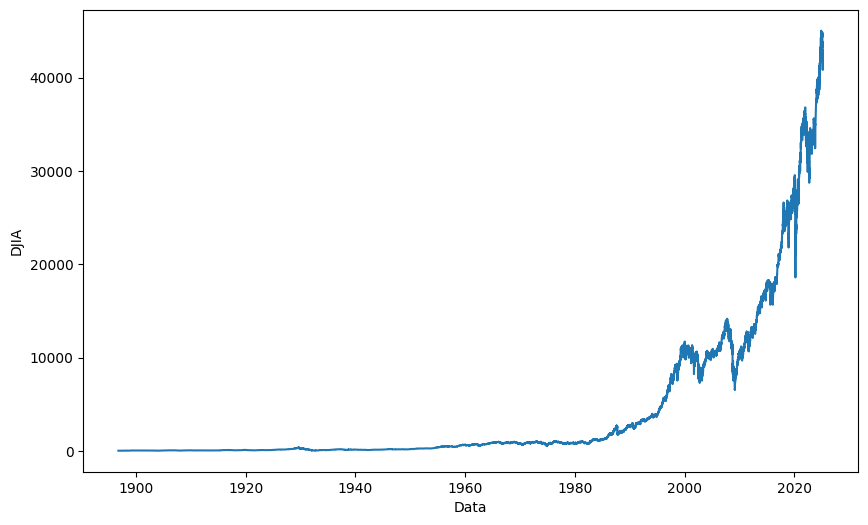

In [8]:
data = pd.read_csv('DJIA_ClosingValues_1896-10-07-2025-03-28.csv')

print("\nPierwsze 6 wierszy:\n",data.head())
print('\nTypy danych:\n',data.dtypes)
print("\nLiczba brakujących wartości w danych:",data['DJIA'].isnull().sum())

data.fillna(data['DJIA'].mean(), inplace=True)

data['Date'] = pd.to_datetime(data['Date'])
print("\nOpis danych:\n",data.describe())

plt.figure(figsize=(10,6))
plt.plot(data['Date'], data['DJIA'])
plt.xlabel('Data')
plt.ylabel('DJIA')
plt.show()


# Dane zawieraja informacje o cenach zamykajcych dni otwarcia gieldy w latach 1896-2025. Łatwo zauważyc, że od lat 80. nastapil gwaltowny wzrost wartości

               Close           High            Low           Open  \
count    2539.000000    2539.000000    2539.000000    2539.000000   
mean    92974.205987   93772.713273   92141.428515   92943.627806   
std     27218.769845   27331.245013   27103.214770   27222.033208   
min     37497.000000   38031.000000   37046.000000   37501.000000   
25%     67354.500000   67764.000000   66655.500000   67245.500000   
50%    100303.000000  101469.000000   99382.000000  100299.000000   
75%    115895.000000  116830.500000  114849.000000  115792.500000   
max    137344.000000  137469.000000  136664.000000  137349.000000   

             Volume  
count  2.539000e+03  
mean   7.343198e+06  
std    4.255026e+06  
min    0.000000e+00  
25%    3.653050e+06  
50%    6.383100e+06  
75%    1.059470e+07  
max    2.602930e+07  
              Close     High      Low     Open     Volume
Date                                                     
2015-01-02  48512.0  50005.0  48345.0  50005.0  2882100.0
2015-0

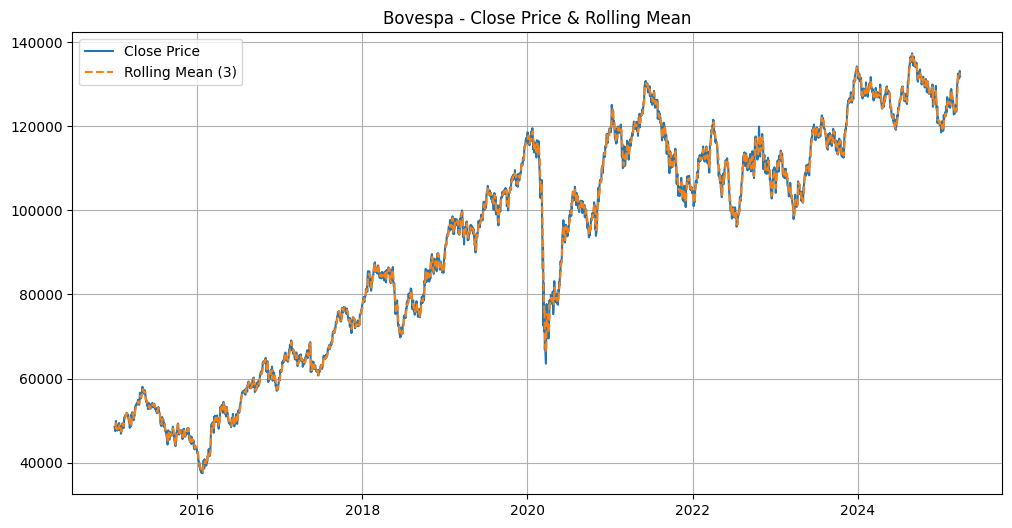

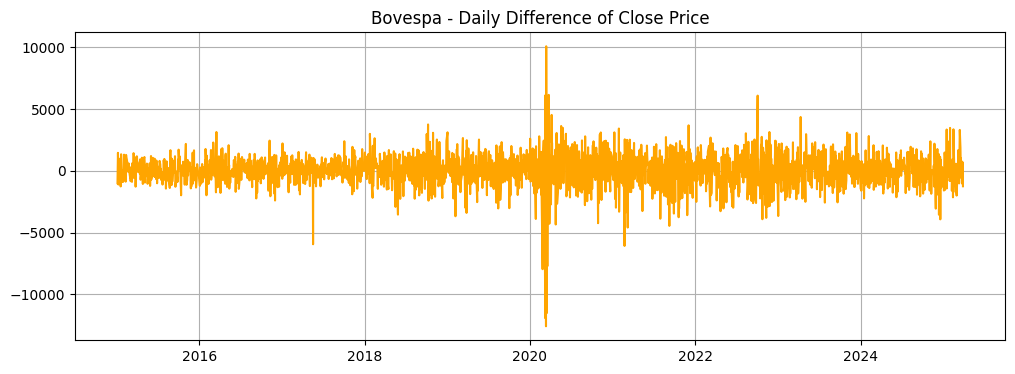

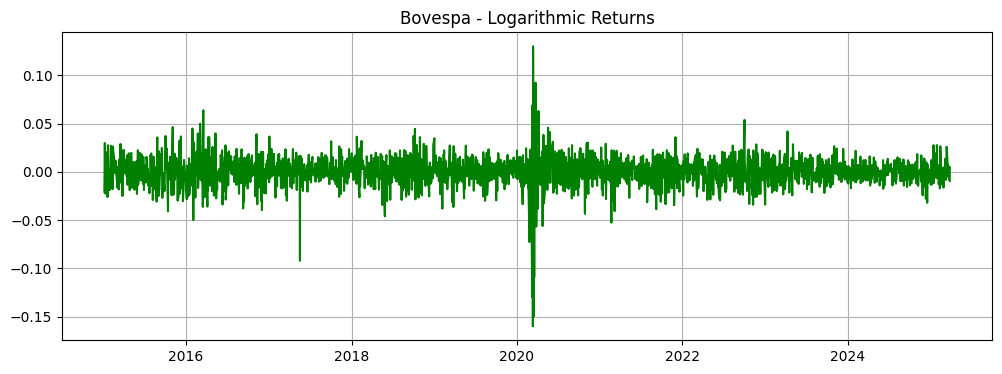

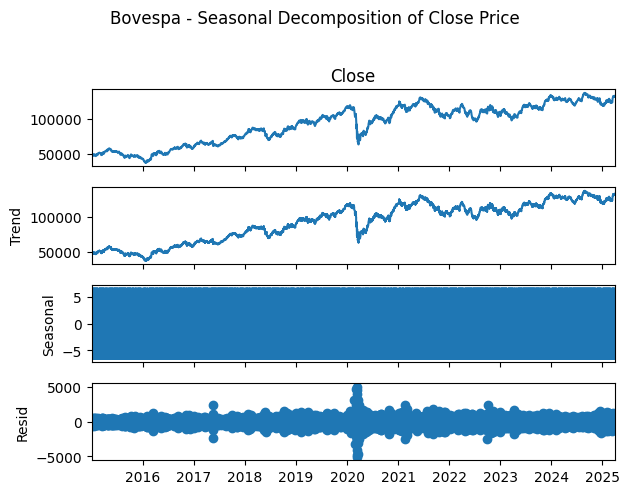

,Close,High,Low,Open,Volume,Close_diff,Log_returns,Rolling_mean_3,Rolling_std_3
Date,,,,,,,,,
2025-03-24,131321.0,132424.0,130992.0,132344.0,8301200.0,-1024.0,-0.007767,131873.666667,516.822342
2025-03-25,132068.0,133471.0,131325.0,131327.0,9237600.0,747.0,0.005672,131911.333333,529.671911
2025-03-26,132520.0,132984.0,132068.0,132069.0,9404600.0,452.0,0.003417,131969.666667,605.518235
2025-03-27,133149.0,133904.0,132479.0,132522.0,10016200.0,629.0,0.004735,132579.000000,542.909753
2025-03-28,131902.0,133143.0,131315.0,133143.0,8905500.0,-1247.0,-0.009410,132523.666667,623.508086


In [ ]:
df = pd.read_csv('Indeksy_gieldowe_2015-2025-03-31/Bovespa_data_2025-03-31.csv')
df = df.drop(df.index[[1, 0]])
df = df.rename(columns = {'Price':'Date'})
# print(df.head())
# print(df.info())
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)
for column in df.columns[0:]:
    df[column] = df[column].astype(float)

print(df.describe())
print(df.head())
print(df.info())



df["Close_diff"] = df["Close"].diff()
df["Log_returns"] = np.log((df["Close"]) / df["Close"].shift(1))

df["Rolling_mean_3"] = df["Close"].rolling(window=3).mean()
df["Rolling_std_3"] = df["Close"].rolling(window=3).std()

df_extended = pd.concat([df]*10).sort_index()
df_extended["Close"] = df_extended["Close"].interpolate()
decomposition = seasonal_decompose(df_extended["Close"], model='additive', period=5)

plt.figure(figsize=(12, 6))
plt.plot(df["Close"], label="Close Price")
plt.plot(df["Rolling_mean_3"], label="Rolling Mean (3)", linestyle='--')
plt.title("Bovespa - Close Price & Rolling Mean")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(df["Close_diff"], label="Price Difference", color='orange')
plt.title("Bovespa - Daily Difference of Close Price")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(df["Log_returns"], label="Log Returns", color='green')
plt.title("Bovespa - Logarithmic Returns")
plt.grid(True)
plt.show()

decomposition.plot()
plt.suptitle("Bovespa - Seasonal Decomposition of Close Price", y=1.02)
plt.tight_layout()
plt.show()



df.tail()


([0, 1, 2, 3],
 [Text(0, 0, 'FFT (NumPy)'),
  Text(1, 0, 'Autokorelacja (NumPy)'),
  Text(2, 0, 'Rolling mean (Pandas)'),
  Text(3, 0, 'Różnicowanie (Pandas)')])

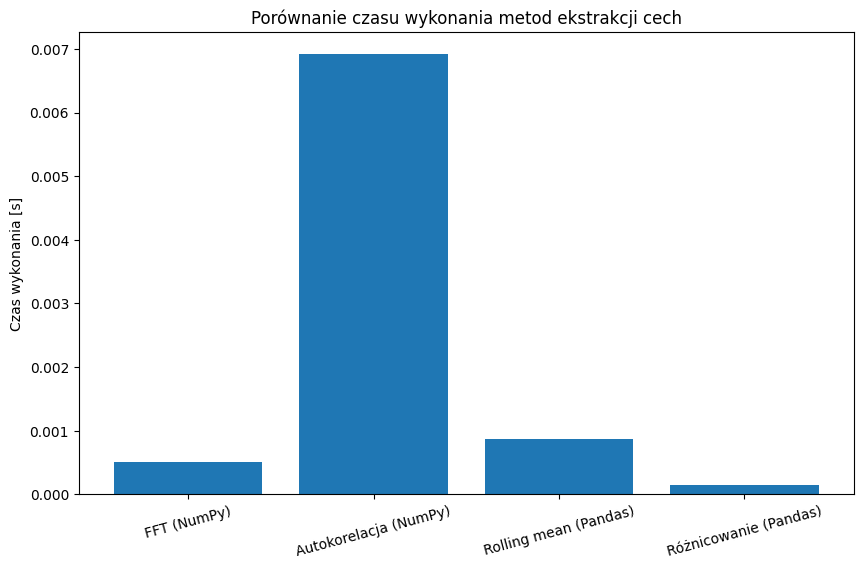

In [10]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt


def numpy_extract_fft_features(signal):
    fft_result = np.fft.fft(signal)
    magnitude = np.abs(fft_result)
    return magnitude[:len(magnitude)//2]

def numpy_extract_autocorrelation(signal):
    n = len(signal)
    signal = signal - np.mean(signal)
    result = np.correlate(signal, signal, mode='full')
    return result[n-1:] / np.max(result)

def pandas_rolling_mean(signal, window=50):
    return pd.Series(signal).rolling(window).mean().values

def pandas_diff(signal):
    return pd.Series(signal).diff().values


def benchmark(method, data, *args):
    start = time.time()
    _ = method(data, *args) if args else method(data)
    end = time.time()
    return end - start

signal = df["Close"]

results = {}
results["FFT (NumPy)"] = benchmark(numpy_extract_fft_features, signal)
results["Autokorelacja (NumPy)"] = benchmark(numpy_extract_autocorrelation, signal)
results["Rolling mean (Pandas)"] = benchmark(pandas_rolling_mean, signal, 50)
results["Różnicowanie (Pandas)"] = benchmark(pandas_diff, signal)



plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.ylabel("Czas wykonania [s]")
plt.title("Porównanie czasu wykonania metod ekstrakcji cech")
plt.xticks(rotation=15)
